# Python 與機器學習（3）

## 郭耀仁

## Scikit-learn

- 應用上我們不需要自己寫演算法的物件類別
- [Scikit-learn](http://scikit-learn.org/stable/) 有非常豐富的演算法讓我們使用
- 像是**感知器**可以透過 `from sklearn.linear_model import Perceptron` 獲得

In [1]:
# 使用 `Scikit-learn` 的感知器

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:100, [0, 2]]
y = iris.target[:100]
y = np.where(y == 0, -1, 1)
ppn = Perceptron(eta0 = 0.01, n_iter = 40, random_state = 0)
ppn = ppn.fit(X, y)

In [2]:
# 使用 `Scikit-learn` 的感知器（2）
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x')
    colors = ('red', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

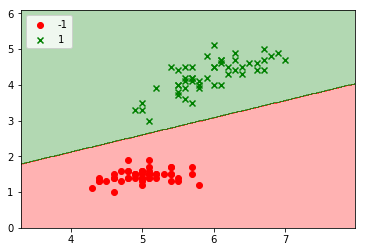

In [3]:
# 使用 `Scikit-learn` 的感知器（3）
import matplotlib.pyplot as plt

plot_decision_boundary(X, y, classifier = ppn)
plt.legend(loc = "upper left")
plt.show()

## 探索 `Scikit-learn`

- `Scikit-learn` 準備了玩具資料集類別 `datasets`

In [4]:
# 探索 Scikit-learn（2）
# datasets 類別
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]] # 花瓣長度與花瓣寬度
y = iris.target

## 探索 Scikit-learn（3）

- `Scikit-learn` 準備了預處理類別 `preprocessing`
- 我們可以使用它的標準化方法將數值標準化：

$$x_{std}^i = \frac{x^i - \mu}{\sigma}$$

In [5]:
# 探索 Scikit-learn（4）
# preprocessing 類別
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)
X_std = ss.transform(X)
print(X[:10], "\n", X_std[:10])

[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.7  0.4]
 [ 1.4  0.3]
 [ 1.5  0.2]
 [ 1.4  0.2]
 [ 1.5  0.1]] 
 [[-1.3412724  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.39813811 -1.31297673]
 [-1.2844067  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.17067529 -1.05003079]
 [-1.3412724  -1.18150376]
 [-1.2844067  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.2844067  -1.4444497 ]]


## 探索 Scikit-learn（5）

- 練習使用 `MinMaxScaler()` 看看有什麼不同

$$x_{norm}^i = \frac{x^i - x_{min}}{x_{max}-x_{min}}$$

## 探索 Scikit-learn（6）

- `Scikit-learn` 準備了模型選擇類別 `model_selection`
- 我們可以使用它的資料切割方法將資料區隔為訓練與測試

In [6]:
# 探索 Scikit-learn（7）
# model_selection 類別
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(105, 2) (45, 2)
(105,) (45,)


## 探索 Scikit-learn（8）

- 練習調整 `test_size` 得到更多訓練樣本

## 探索 Scikit-learn（9）

- 我們自己寫的感知器只能夠進行二元分類
- `iris` 資料的類別有三類：`np.unique(iris.target_names)`
- `Scikit-learn` 的感知器可以支援多元分類，利用 **One-vs.-all** 方法

[Lecture 39 - Multiclass Classification: One-vs-all](https://www.coursera.org/learn/machine-learning/lecture/68Pol/multiclass-classification-one-vs-all)

In [7]:
# 探索 Scikit-learn（10）
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print(y_test) # 答案
print(y_pred) # 預測
print(y_test == y_pred) # 對答案

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 2 1 1 2 2 1 2 1 0 2 1 0 0 2 2 0 0 2 0 0 1 0 0 2 2 0 2 2 0 0
 2 2 1 2 0 2 0 0]
[ True  True  True  True  True  True  True False  True  True  True False
  True False  True  True False  True  True  True  True False  True  True
  True  True  True  True False  True  True False  True  True  True False
  True False False  True  True  True  True  True  True]


# 探索 Scikit-learn（11）

- `Scikit-learn` 準備了模型評估類別 `metrics`
- 我們可以使用它的準確率方法計算準確率

In [8]:
# 探索 Scikit-learn（12）
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.78


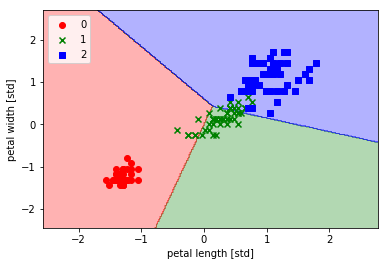

In [9]:
# 探索 Scikit-learn（13）

from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', 's') # 有三個類別
    colors = ('red', 'green', 'blue') # 有三個類別
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                     np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1], c = cmap(idx), marker = markers[idx], label = cl)

plot_decision_boundary(X = X_std, y = y, classifier = ppn)
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()